# Question 1

Import packages, load data and instantiate scaler and PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

q1_data = pd.read_csv("PADL-Q1.csv")
scaler = StandardScaler()
pca = PCA(n_components=5)

Apply PCA to scaled data

In [2]:
q1_data_scaled = scaler.fit_transform(q1_data)
q1_pcs = pca.fit_transform(q1_data_scaled)

Check the minimum number of dimensions required to minimize loss of information

In [3]:
total_variance = sum(q1_pcs.var(axis=0))
for n_comp in range(1, q1_pcs.shape[1]):
    first_n_comp_variance = (
        sum(q1_pcs[:, 0:n_comp].var(axis=0)) / total_variance
    ) * 100
    print(
        f"The first {n_comp} principal components correspond to {first_n_comp_variance.round(2)}% of the total variance"
    )

The first 1 principal components correspond to 40.32% of the total variance
The first 2 principal components correspond to 70.24% of the total variance
The first 3 principal components correspond to 81.51% of the total variance
The first 4 principal components correspond to 91.95% of the total variance


Reducing the number of dimensions to four allows for a relatively small loss of information - the 4 components correspond to around 92 percent of the total variance.

In [4]:
pca_min_dims = PCA(n_components=4)
q1_pcs_min_dimensions = pca_min_dims.fit_transform(q1_data_scaled)
components = pca_min_dims.components_
components

array([[-0.55608777,  0.16605693, -0.55968369,  0.2074285 , -0.55400277],
       [-0.07616798, -0.68491569, -0.21946827, -0.67209755, -0.15876868],
       [-0.58290436,  0.2674771 , -0.13665832, -0.32308723,  0.68236182],
       [ 0.56104011,  0.48673801, -0.55197578, -0.37899935, -0.00152482]])

# Question 2

In [292]:
import pandas as pd

q2_data = pd.read_csv("PADL-Q2-train.csv")
q2_data.head()
q2_data_X, q2_data_y = q2_data.drop(columns=["out", "y"]), q2_data["out"]

In [293]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    q2_data_X,
    q2_data_y,
    train_size=0.9,  # There is more unknown data to test on so we can use more for training
    random_state=303,
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((72, 3), (72,), (8, 3), (8,))

In [294]:
from sklearn.feature_selection import r_regression

r_regression(X_train, y_train)

array([-0.3598524 , -0.45770557,  0.42611551])

In [295]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.simplefilter("ignore", category=ConvergenceWarning)
num_poly_features = [1, 2, 3, 4, 5]
regularisations = [
    RidgeCV(fit_intercept=True),
    LassoCV(fit_intercept=True),
    Ridge(fit_intercept=True),
    Lasso(fit_intercept=True),
    LinearRegression(fit_intercept=True),
    RidgeCV(fit_intercept=False),
    LassoCV(fit_intercept=False),
    Ridge(fit_intercept=False),
    Lasso(fit_intercept=False),
    LinearRegression(fit_intercept=False),
]
preprocessing = [MinMaxScaler(), StandardScaler(), Normalizer(), PCA(n_components=3)]
best_r2 = -100000
best_model = None
for degree in num_poly_features:
    for reg in regularisations:
        for proc in preprocessing:
            model = make_pipeline(proc, PolynomialFeatures(degree), reg)
            model.fit(X_train, y_train)
            current_r2 = r2_score(y_test, model.predict(X_test))
            if current_r2 > best_r2:
                best_r2 = current_r2
                best_model = model
            print(r2_score(y_test, model.predict(X_test)))

-0.7219295695540431
-0.7228610084406963
-0.03177341702877423
-0.840326660594799
-0.843274626707684
-0.8533318977650464
-0.7934615978124451
-0.8496961313325442
-0.7219295695540389
-0.8401907191921834
-0.03264473295358683
-0.8962040152533735
-0.032861269383324565
-0.032861269383324565
-0.032861269383324565
-0.045034145738546805
-0.8551904141849893
-0.85519041418499
-0.8192690482479554
-0.855190414185039
-0.6921123475852329
-0.735474970630716
-0.035136685311303095
-0.8404723621598278
-0.8242594022711378
-0.800148477812163
-0.3374869823606639
-0.8700464503154051
-0.6921123475852116
-0.8416780300253368
-0.03285485053067472
-0.8975423887699652
-0.07766392758136087
-0.07766392758136087
-0.07766392758136087
-0.10172246692993125
-0.8551904141849915
-0.8551904141849906
-0.8192690482478997
-0.8551904141850384
-1.371694934129128
-1.7252338922542645
-0.031988798140858865
-2.192721063852733
-2.056191512658155
-1.9834375022845974
-0.5095786380132798
-0.6366096744245913
-0.7652026513562591
-2.15543578

/Users/ivanbar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.25798e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


-1.2351252243152118
0.07271619958768549
-0.6329358585769147
-0.1895554689558412
-0.779165576938788
-11.684507275546641
-0.03193434169335019
-6.594621644975882
-0.07766392758136087
-0.07766392758136087
-0.07766392758136087
0.07143737243486514
-17.486507596645993
-17.43745358356303
-7.148456957719848
-17.474258984606518


/Users/ivanbar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.19386e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.3416312558578448


Pipeline(steps=[('pca', PCA(n_components=3)),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('lasso', Lasso())])

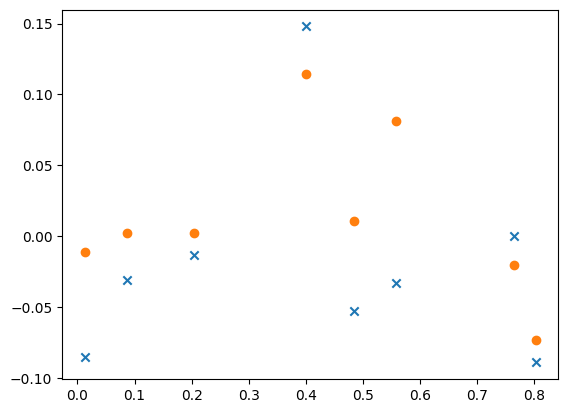

In [297]:
import matplotlib.pyplot as plt

print(best_r2)
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
plt.scatter(X_test["z"], y_test, marker="x")
plt.scatter(X_test["z"], preds)
best_model

# Question 3

In [5]:
L = ["gold", "diamond", "robbery", "bank", "police"]

Capture all triplets matching the pattern 'X and Y'

In [6]:
import re

pattern = re.compile(
    r"(?=("  # We need a lookahead because triplets can overlap (e.g. 'X and Y and Z'), normal regex will not capture the second triplet
    r"(?<![a-zA-Z-])"  # Negative lookbehind, ensuring that each triplet starts at the beginning of the first word.
    r"[a-zA-z]+"  # At least one letter (so we don't capture triplets like ', and then')
    r"[\S]*"  # Any number of further letters and/or punctuation except whitespace
    r"\s+"  # At least one whitespace character (newline, tab, space, etc)
    r"[Aa]nd"  # 'And' or 'and'
    r"\s+"  # At least one whitespace character
    r"[a-zA-z]+"  # At least one letter
    r"[\S]*"  # Any number of further letters and/or punctuation
    r"))"
)
print(pattern.findall("testing and trialling"))  # Can capture a single triplet
print(pattern.findall("X and Y and Z"))  # Can capture overlapping triplets
print(pattern.findall("tight-fitting and sleek"))  # Can capture hyphenated words
print(pattern.findall("One And two"))  # Case-insensitive for and
print(
    pattern.findall("This is the end of one sentence. And so, another begins.")
)  # Can capture triplets across sentences
print(
    pattern.findall(
        """
This is the end of one sentence.
And the other is on a new line.
"""
    )
)  # Can handle line breaks
print(
    pattern.findall("What?! And you're only telling me now?")
)  # Can handle other punctuation

['testing and trialling']
['X and Y', 'Y and Z']
['tight-fitting and sleek']
['One And two']
['sentence. And so,']
['sentence.\nAnd the']
["What?! And you're"]


In [7]:
with open("sherlock.txt") as sherlock_file:
    sherlock_full_text = (
        sherlock_file.read()
    )  # full text needed to train the model later
    captured_triplets = pattern.findall(sherlock_full_text)
captured_triplets = [
    re.sub(re.compile(r"\s"), " ", triplet) for triplet in captured_triplets
]  # Replace whitespace (tabs, newlines, etc) characters with spaces

Create a convenience function to compare the length of the shared suffixes: start at the end of each word and iterate backwards until the first pair of letters does not match

In [8]:
def shared_suffix_length(word1: str, word2: str) -> int:
    suffix_length = 0
    for l1, l2 in zip(word1[::-1], word2[::-1]):
        if l1.lower() == l2.lower():
            suffix_length += 1
        else:
            return suffix_length
    return suffix_length


print(shared_suffix_length("bold", "gold"))
print(shared_suffix_length("lobster", "mobster"))
print(shared_suffix_length("apple", "potato"))

3
6
0


Find triplets where the last word rhymes with the target word

In [9]:
rhymes = {}
for word in L:
    rhymes[word] = [
        re.sub(
            "[.,-]", "", triplet
        ).lower()  # remove any punctuation and convert to lowercase for consistency
        for triplet in captured_triplets
        if shared_suffix_length(
            word,
            re.sub(r"\s+", " ", triplet).split(" ")[  # Remove any repeating whitespace
                2
            ],
        )
        >= 3
    ]

In [10]:
rhymes

{'gold': ['away and told', 'rapidly and told', 'indemnify and hold'],
 'diamond': [],
 'robbery': ['delicacy and every',
  'pay and very',
  'ten and every',
  'abbots and archery',
  'police and every',
  'air and scenery',
  'long and very',
  'armchair and cheery',
  'police and very'],
 'bank': ['do and frank', 'mercifully and thank'],
 'police': ['help and advice']}

Load up a pre-trained word2vec model

In [11]:
import nltk
from gensim import downloader as api
from gensim.models import Word2Vec

nltk.download("punkt")

# Load the glove-wiki-gigaword-100 pre-trained word2vec model
model = api.load("glove-wiki-gigaword-100")
sherlock_model = Word2Vec(sherlock_full_text, vector_size=100, min_count=1, epochs=30)
total_examples = sherlock_model.corpus_count
sherlock_model.build_vocab([list(model.key_to_index.keys())], update=True)
sherlock_model.wv.vectors_lockf = np.ones(len(sherlock_model.wv))
sherlock_model.wv.intersect_word2vec_format(
    "~/gensim-data/glove-wiki-gigaword-100/glove-wiki-gigaword-100.gz",
    binary=False,
    lockf=1.0,
)
sherlock_model.train(sherlock_full_text, total_examples=total_examples, epochs=30)

/Users/ivanbar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[nltk_data] Downloading package punkt to /Users/ivanbar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(14731934, 17861220)

Create a utility function to give a 'similarity score' to a triplet

In [12]:
def similarity_score(triplet: str) -> float:
    first_word = triplet.split(" ")[0]
    last_word = triplet.split(" ")[2]
    return sherlock_model.wv.similarity(first_word, last_word)

In [13]:
for word, triplets in rhymes.items():
    top_5_similar_triplets = sorted(triplets, key=similarity_score, reverse=True)[0:5]
    print(f"The best 5 cockney rhymes for word '{word}' are: {top_5_similar_triplets}")

The best 5 cockney rhymes for word 'gold' are: ['away and told', 'rapidly and told', 'indemnify and hold']
The best 5 cockney rhymes for word 'diamond' are: []
The best 5 cockney rhymes for word 'robbery' are: ['long and very', 'ten and every', 'police and every', 'pay and very', 'police and very']
The best 5 cockney rhymes for word 'bank' are: ['do and frank', 'mercifully and thank']
The best 5 cockney rhymes for word 'police' are: ['help and advice']


# Question 4

In [14]:
import torch
from sklearn.model_selection import train_test_split

NUMBER_RANGE = np.arange(-100, 100, 1)

In [15]:
lefts = torch.tensor(NUMBER_RANGE, dtype=torch.float32)
rights = torch.tensor(NUMBER_RANGE, dtype=torch.float32)
X = torch.cartesian_prod(lefts, rights)
y = torch.tensor(np.prod(X.numpy(), axis=1), dtype=torch.float32).unsqueeze(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [16]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 1),
)
optim = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.L1Loss()
scheduler = torch.optim.lr_scheduler.StepLR(
    optim, step_size=15000, gamma=0.1
)  # The Adam optimizer tends to need some 'help' after the first 15000 epochs, reducing the learning rate for the last bit helps it reduce the loss further.
epochs = 20000

In [17]:
for epoch in range(epochs):
    y_predict = model(X_train)
    loss = criterion(y_train, y_predict)
    optim.zero_grad()
    loss.backward()
    optim.step()
    scheduler.step()
    if not epoch % 200:
        print(f"Epoch: {epoch}, loss: {loss}")

Epoch: 0, loss: 2505.53662109375
Epoch: 200, loss: 516.0245971679688
Epoch: 400, loss: 515.6104125976562
Epoch: 600, loss: 515.4878540039062
Epoch: 800, loss: 515.1753540039062
Epoch: 1000, loss: 514.3235473632812
Epoch: 1200, loss: 512.485107421875
Epoch: 1400, loss: 508.9345397949219
Epoch: 1600, loss: 500.4862365722656
Epoch: 1800, loss: 485.36175537109375
Epoch: 2000, loss: 461.1476745605469
Epoch: 2200, loss: 423.6922912597656
Epoch: 2400, loss: 356.8420715332031
Epoch: 2600, loss: 278.87493896484375
Epoch: 2800, loss: 201.75035095214844
Epoch: 3000, loss: 153.1502227783203
Epoch: 3200, loss: 121.29487609863281
Epoch: 3400, loss: 104.75508880615234
Epoch: 3600, loss: 88.6241683959961
Epoch: 3800, loss: 77.46271514892578
Epoch: 4000, loss: 68.27930450439453
Epoch: 4200, loss: 61.28804397583008
Epoch: 4400, loss: 57.371315002441406
Epoch: 4600, loss: 51.13270950317383
Epoch: 4800, loss: 45.965213775634766
Epoch: 5000, loss: 42.68255615234375
Epoch: 5200, loss: 40.94471740722656
Epoc

In [18]:
def predict_pair(left, right):
    """
    Convenience method to make a single prediction and output the results using the trained model.
    :param left: the first number to multiply
    :param right: the second number to multiply
    """
    with torch.no_grad():
        prediction = model(torch.tensor([left, right], dtype=torch.float32))
        actual = left * right
        print(
            f"Inputs: {left}, {right}\nPredicted value: {prediction.item()}\nActual value: {actual}\nAbsolute error: {abs(prediction.item() - actual)}"
        )

In [19]:
test_criterion = torch.nn.L1Loss()
with torch.no_grad():
    test_preds = model(X_test)
    print(test_criterion(test_preds, y_test))

tensor(18.5115)


# Question 5

In [1]:
from torch.utils.data import Dataset
import torch
import os
from torchvision.io import read_image
from pathlib import Path
from glob import glob
import matplotlib.pyplot as plt


class ClocksDataset(Dataset):
    def __init__(self, data_dir: str, transform=None):
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(glob(f"{self.data_dir}/*.txt"))

    def __getitem__(self, item):
        img_path = os.path.join(self.data_dir, f"{str(item).zfill(4)}.png")
        label_path = os.path.join(self.data_dir, f"{str(item).zfill(4)}.txt")
        image = read_image(img_path)
        if self.transform:
            image = self.transform(image)
        label = Path(label_path).read_text()
        hours, minutes = label.split(":")
        minutes_since_midnignt = torch.tensor(
            (int(hours) * 60) + int(minutes), dtype=torch.float32
        )
        return (
            image,
            minutes_since_midnignt,
        )  # torch.tensor([int(hours), int(minutes)], dtype=torch.float32)

/Users/ivanbar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from torchvision.transforms import v2
from torch.utils.data import SubsetRandomSampler, DataLoader
from sklearn.model_selection import train_test_split

transform = v2.Compose(
    [
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)
train_indices, test_indices = train_test_split(
    range(1000), train_size=0.9
)  # there is another set of data to test with so train on more data than usual
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

In [4]:
dataset = ClocksDataset("train", transform)
train_loader = DataLoader(dataset, sampler=train_sampler, batch_size=4)
test_loader = DataLoader(dataset, sampler=test_sampler, batch_size=len(test_indices))

In [4]:
import torch.nn as nn
import torchvision.models as models


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=2
        )
        self.sigmoid = nn.Tanh()  # LeCun actually uses hyperbolic tangent, though the paper talks about "sigmoidal function"
        self.meanpool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0
        )
        self.fc1 = nn.Linear(in_features=110 * 110 * 16, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=2)

    def forward(self, x):
        # Input x has dimensions B x 1 x 28 x 28, B is batch size
        # Comments show tensor size output from previous line
        x = self.conv1(x)
        # B x 6 x 28 x 28
        x = self.sigmoid(x)
        x = self.meanpool(x)
        # B x 6 x 14 x 14
        x = self.conv2(x)
        # B x 16 x 10 x 10
        x = self.sigmoid(x)
        x = self.meanpool(x)
        # B x 16 x 5 x 5
        x = x.view(x.size(0), -1)
        # Flattened to B x 400
        x = self.fc1(x)
        # B x 120
        x = self.sigmoid(x)
        x = self.fc2(x)
        # B x 84
        x = self.sigmoid(x)
        x = self.fc3(x)
        # B x 10
        return x


# Instantiate the model - this initialises all weights and biases
model = models.mobilenet_v2()
model.classifier[1] = torch.nn.Linear(1280, 1)
model.to("mps")

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [7]:
clock_loss = torch.nn.L1Loss()
clock_optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 30
output_sigmoid = torch.nn.Sigmoid()
model.train()

CONVERT_HOURS_MINUTES = torch.tensor((23 * 59) + 59, dtype=torch.float32).to("mps")
for epoch in range(num_epochs):
    total_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        output = output_sigmoid(model(images.to("mps"))) * CONVERT_HOURS_MINUTES
        loss = clock_loss(output, labels.unsqueeze(1).to("mps"))
        clock_optimizer.zero_grad()
        loss.backward()
        clock_optimizer.step()
        total_loss += loss
    print("Total loss over epoch {}: {:.2f}".format(epoch + 1, total_loss))

Total loss over epoch 1: 48652.93
Total loss over epoch 2: 43352.84
Total loss over epoch 3: 42225.95
Total loss over epoch 4: 41317.18
Total loss over epoch 5: 41545.20
Total loss over epoch 6: 41376.16
Total loss over epoch 7: 41875.88
Total loss over epoch 8: 40719.36
Total loss over epoch 9: 41231.54
Total loss over epoch 10: 41768.09
Total loss over epoch 11: 41276.45
Total loss over epoch 12: 40409.02
Total loss over epoch 13: 40586.40
Total loss over epoch 14: 40582.07
Total loss over epoch 15: 40987.29
Total loss over epoch 16: 40455.64
Total loss over epoch 17: 41299.62
Total loss over epoch 18: 40829.52


KeyboardInterrupt: 

In [424]:
def minutes_from_midnignt_to_time(minutes):
    return f"{str(int(minutes // 60)).zfill(2)} : {str(int(minutes % 60)).zfill(2)}"


model.eval()
images, labels = next(iter(test_loader))
output = output_sigmoid(model(images.to("mps")))

# Display first 25 images with predicted labels
figure = plt.figure(figsize=(32, 16))
for i in range(16):
    figure.add_subplot(4, 4, i + 1)
    plt.title(
        "True: {}/Pred: {}".format(
            labels[i],
            list(map(round, (output[i] * CONVERT_HOURS_MINUTES).tolist())),
        )
    )
    plt.axis("off")
    plt.imshow(images[i, :].squeeze().permute(1, 2, 0), cmap="gray")
plt.show()

NameError: name 'test_loader' is not defined

tensor([0.4996, 0.5006, 0.4875, 0.4931, 0.4973, 0.4988, 0.4887, 0.5035, 0.4991,
        0.4998, 0.4895, 0.4855, 0.5025, 0.4965, 0.4985, 0.5005, 0.5057, 0.4859,
        0.5039, 0.4922, 0.5068, 0.4899, 0.5045, 0.4976, 0.4897, 0.4968, 0.5076,
        0.5065, 0.4954, 0.4979, 0.4950, 0.4988, 0.5111, 0.4947, 0.5040, 0.5015,
        0.5037, 0.4981, 0.4997, 0.5088, 0.4887, 0.4985, 0.4873, 0.4912, 0.4918,
        0.4863, 0.4977, 0.4933, 0.4786, 0.5008, 0.4914, 0.5032, 0.5009, 0.4908,
        0.4926, 0.4974, 0.4960, 0.4936, 0.4920, 0.4900, 0.4985, 0.4958, 0.4962,
        0.4892, 0.5065, 0.5068, 0.5029, 0.4907, 0.4890, 0.4988, 0.4998, 0.5010,
        0.4875, 0.5004, 0.5082, 0.4873, 0.4941, 0.5087, 0.5013, 0.4894, 0.4928,
        0.4907, 0.4915, 0.5013, 0.5052, 0.5087, 0.5009, 0.4986, 0.4995, 0.4931,
        0.4893, 0.4952, 0.5011, 0.4888, 0.4985, 0.5018, 0.5004, 0.4979, 0.4998,
        0.4809], device='mps:0', grad_fn=<SelectBackward0>)

# Question 6

No need to split training and testing data this time, train on entire dataset

In [166]:
batch_size = 10
nz = 100  # Size of z latent vector (i.e. size of generator input)
ngf = 256  # Size of feature maps in generator
ndf = 32  # Size of feature maps in discriminator
lr = 0.0002  # Learning rate for optimizers
beta1 = 0.5  # Beta1 hyperparam for Adam optimizers

In [167]:
transform = v2.Compose(
    [
        v2.Resize((128, 128)),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ]
)
dataset = ClocksDataset("train", transform)
data_loader = DataLoader(dataset, batch_size=batch_size)

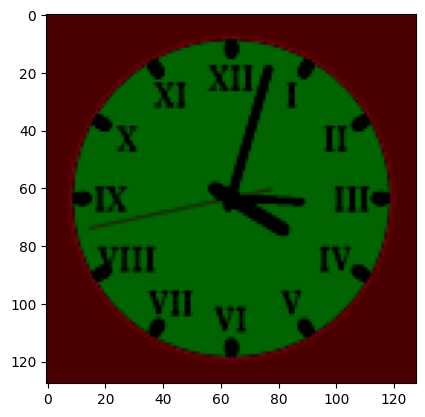

In [168]:
img, _ = dataset[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))

In [169]:
import torch.nn as nn


class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf * 16, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 16),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 16, ngf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d(ngf, 3, 4, 2, 1, bias=False),
            nn.Tanh(),
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)


netG = Generator()
netG = netG.to("mps")

env: PYTORCH_ENABLE_MPS_FALLBACK=1
torch.Size([1, 3, 128, 128])


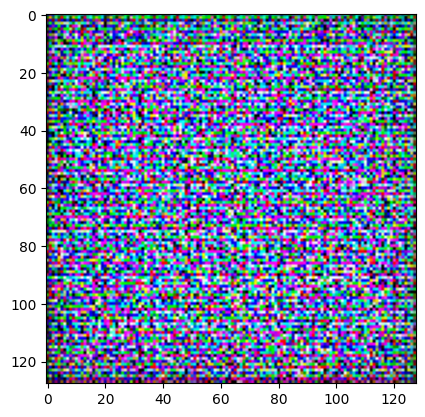

In [170]:
%env PYTORCH_ENABLE_MPS_FALLBACK=1
random_z = torch.rand(1, nz, 1, 1).to("mps")
random_out = netG(random_z)
print(random_out.shape)
plt.imshow(
    random_out.squeeze(0).squeeze(0).permute(1, 2, 0).clamp(0, 1).cpu().detach().numpy()
)

In [171]:
class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = torch.nn.Sequential(
            # input is ``(nc) x 64 x 64``
            nn.Conv2d(3, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf) x 32 x 32``
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*2) x 16 x 16``
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*4) x 8 x 8``
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*8) x 4 x 4``
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid(),
        )

    def forward(self, input):
        return self.main(input)


netD = Discriminator()
netD = netD.to("mps")

In [172]:
random_z = torch.rand(1, nz, 1, 1).to("mps")
random_out = netG(random_z)
netD(random_out).shape

torch.Size([1, 1, 1, 1])

In [173]:
device = "mps"

In [174]:
# Initialize BCELoss function
criterion = nn.BCELoss()
num_epochs = 40  # Number of training epochs
# Establish convention for real and fake labels during training
real_label = 1.0
fake_label = 0.0

# Setup Adam optimizers for both G and D
optimizerD = torch.optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

# Training Loop

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, (images, labels) in enumerate(data_loader, 0):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_images = images.to(device)
        label = torch.full(
            (batch_size,), real_label, dtype=torch.float32, device=device
        )
        # Forward pass real batch through D
        output = netD(real_images).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        z = torch.randn(batch_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(z)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()
        # Output training stats
        if i % 50 == 0:
            print(
                "[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f"
                % (
                    epoch + 1,
                    num_epochs,
                    i,
                    len(data_loader),
                    errD.item(),
                    errG.item(),
                    D_x,
                    D_G_z1,
                    D_G_z2,
                )
            )
    print("Saving test image...")
    plt.imsave(
        f"out/epoch-{epoch+1}.png",
        netG(torch.rand(1, nz, 1, 1).to("mps"))
        .squeeze(0)
        .permute(1, 2, 0)
        .clamp(0, 1)
        .squeeze(0)
        .cpu()
        .detach()
        .numpy(),
    )

Starting Training Loop...
[1/40][0/1000]	Loss_D: 1.3984	Loss_G: 3.3048	D(x): 0.4655	D(G(z)): 0.4516 / 0.0374
[1/40][50/1000]	Loss_D: 0.1885	Loss_G: 5.5447	D(x): 0.8529	D(G(z)): 0.0119 / 0.0039
[1/40][100/1000]	Loss_D: 0.5831	Loss_G: 4.0148	D(x): 0.8093	D(G(z)): 0.2740 / 0.0271
[1/40][150/1000]	Loss_D: 0.7163	Loss_G: 2.2156	D(x): 0.6913	D(G(z)): 0.2746 / 0.1236
[1/40][200/1000]	Loss_D: 0.9381	Loss_G: 1.6789	D(x): 0.5695	D(G(z)): 0.2872 / 0.2018
[1/40][250/1000]	Loss_D: 0.4401	Loss_G: 3.2445	D(x): 0.7598	D(G(z)): 0.1432 / 0.0428
[1/40][300/1000]	Loss_D: 1.4153	Loss_G: 1.0124	D(x): 0.5042	D(G(z)): 0.4714 / 0.3815
[1/40][350/1000]	Loss_D: 1.1806	Loss_G: 1.0956	D(x): 0.5294	D(G(z)): 0.4165 / 0.3373
[1/40][400/1000]	Loss_D: 1.2504	Loss_G: 1.0625	D(x): 0.5627	D(G(z)): 0.4706 / 0.3581
[1/40][450/1000]	Loss_D: 1.5478	Loss_G: 0.9794	D(x): 0.4532	D(G(z)): 0.4761 / 0.3896
[1/40][500/1000]	Loss_D: 1.0824	Loss_G: 1.8305	D(x): 0.6072	D(G(z)): 0.4203 / 0.1736
[1/40][550/1000]	Loss_D: 1.0488	Loss_G: 1.

KeyboardInterrupt: 

env: PYTORCH_ENABLE_MPS_FALLBACK=1
torch.Size([1, 3, 128, 128])


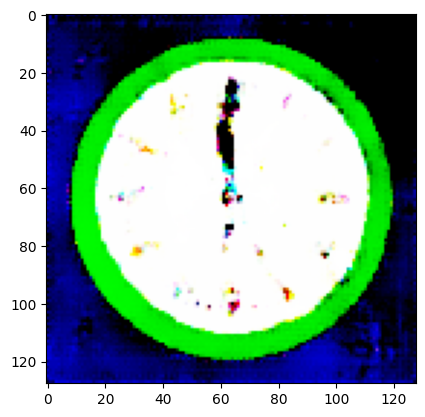

In [175]:
%env PYTORCH_ENABLE_MPS_FALLBACK=1
random_z = torch.rand(1, nz, 1, 1).to("mps")
random_out = netG(random_z)
print(random_out.shape)
plt.imshow(
    random_out.squeeze(0).squeeze(0).permute(1, 2, 0).clamp(0, 1).cpu().detach().numpy()
)

Generate 8 random clock images

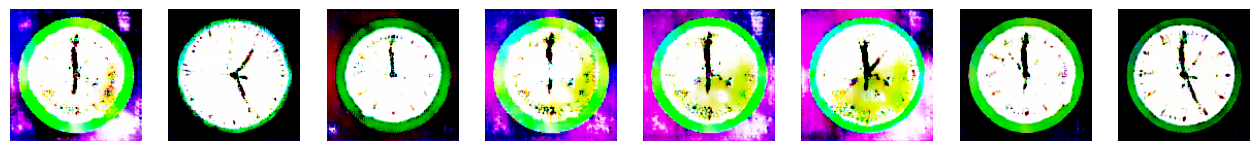

In [183]:
fig, ax = plt.subplots(1, 8, figsize=(16, 8))
for i in range(8):
    z = torch.rand(1, nz, 1, 1).to("mps")
    gen = netG(z)
    ax[i].axis("off")
    ax[i].imshow(
        gen.squeeze(0).squeeze(0).permute(1, 2, 0).clamp(0, 1).cpu().detach().numpy()
    )

Linear interpolation demo

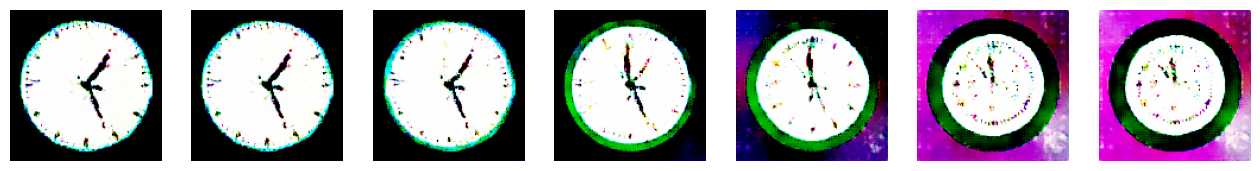

In [194]:
import numpy as np

fig, ax = plt.subplots(1, 7, figsize=(16, 8))
z1, z2 = torch.rand(1, nz, 1, 1).to("mps"), torch.rand(1, nz, 1, 1).to("mps")
intermediates = [z1]
for i in np.arange(1, 10, 2):
    intermediates.append((z1 * (1 - (i / 10))) + (z2 * (i / 10)))
intermediates.append(z2)

for idx, img in enumerate(intermediates):
    ax[idx].imshow(
        netG(img)
        .squeeze(0)
        .squeeze(0)
        .permute(1, 2, 0)
        .clamp(0, 1)
        .cpu()
        .detach()
        .numpy(),
        cmap="gray",
    )
    ax[idx].axis("off")

In [188]:
torch.save(netG.state_dict(), "netG-ngf256-128x128-34-epochs.pt")
torch.save(netD.state_dict(), "netD-ngf32-128x128-34-epochs.pt")